<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Tonatiuh Navarro Silva y Pablo Muñoz 

**Fecha:** 22 de Junio del 2021

**Expediente** : 722399 y 719963
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/if722399/Tarea5y6_JTNavarro_PHMu-oz

 Tarea 6: Clase 10

In [4]:
import numpy as np
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
 

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


Código de solución estudiante 1

Validamos que se cumpla la condición: max t(x) = [1.875] max f(x) = [1.875]


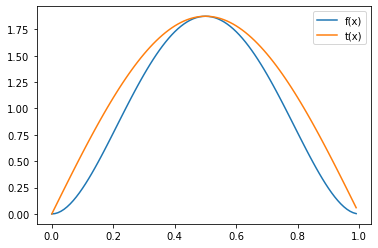

In [59]:
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4) # Definimos f(x)
# Obtener el máximo de la función
max_f = f(optimize.fmin(lambda x: -f(x),0, disp = False)) # obtenemos el máximo de la función
t = lambda x: max_f*np.sin(np.pi*x) # Establecemos la condicion que nos proporciona el problema
max_t = f(optimize.fmin(lambda x: -t(x), 0, disp=False)) # Sacamos el máximo de t(x)

x = np.arange(0,1,.01)
print('Validamos que se cumpla la condición: max t(x) =',max_t, 'max f(x) =',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();

Código de solución estudiante 2

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).


Código de solución - Tonatiuh

$$
c = \int_{-\infty}^{\infty} t(x) dx = \int_{0}^{1} a*sin(\pi x) dx \\
\int_{0}^{1} a*sin(\pi x) dx = \frac{2a}{\pi}  \\ 
g(x) = \frac{t(x)}{c}\\
g(x) = \frac{a*sin(\pi x)}{\frac{2a}{\pi}}\\
g(x) = \frac{\pi}{2}sin(\pi x)\\
$$

Código de solución estudiante 2

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 


Código de solución estudiante 1

#### Como lo que tenemos es g(x) osea -> PDF, Necesitamos G(x) -> CDF


$$
G(x) = \int g(x) dx \\
G(x) = \int_{0}^{1} \frac{\pi}{2}sin(\pi x) dx\\
G(x) = \frac{1-cos(\pi x)}{2}\\
U = \frac{1-cos(\pi x)}{2}\\
x = \frac{cos^{-1}(-2U+1)}{\pi}
$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada.  

Código de solución estudiante 1

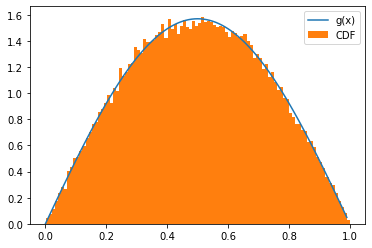

In [20]:
N = 100000

u = np.random.rand(N)
x = np.arange(0,1,0.01)

g = lambda x: (np.pi*np.sin(np.pi*x))/2
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)


plt.plot(x, g(x), label = 'g(x)')
plt.hist(g_inv(u), 100, density = True, label = 'CDF')
plt.legend();

Código de solución estudiante 2

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones  𝑓(𝑥)  y  𝑡(𝑥)  para validar que todos los cálculos anteriores están correctamente realizados.  

Código de solución estudiante 1

In [57]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]       
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

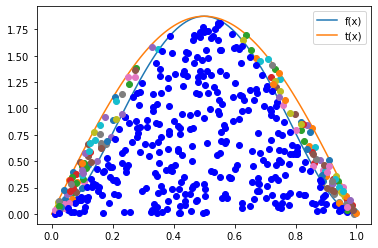

In [61]:
N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

A = Acep_rechazo(R2,R1,f,t)

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


6. Comparar el porcentaje de puntos de aceptación cuando se usa  𝑡(𝑥)  constante y  𝑡(𝑥)  un pulso senoidal. Concluir

Código de solución estudiante 1

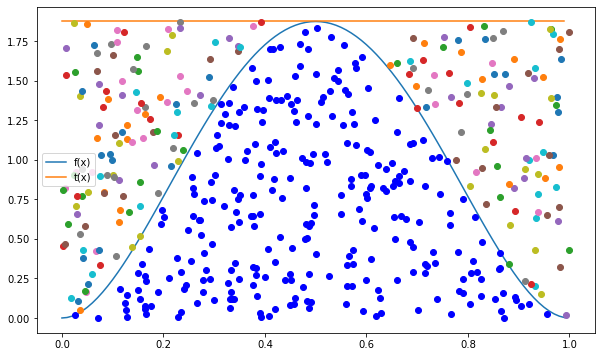

In [62]:
t = lambda x: max_f * np.ones(len(x))
N = 500

R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(10, 6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

AA = Acep_rechazo(R2, R1, f, t)
plt.show()

In [66]:
print(f'{len(A)*100/500:.4f}% de valores aceptados con t(x) senoidal')
print(f'{len(AA)*100/500:.4f}% de valores aceptados con t(x) constante')

66.4000% de valores aceptados con t(x) senoidal
56.0000% de valores aceptados con t(x) constante


#### Es mejor utilizar t(x) senoidal debido a que si utilizamos constante tendrìamos que generar màs variables aleatorias

Código de solución estudiante 2

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

Código de solución estudiante 1

El máximo de f es: 2.109375


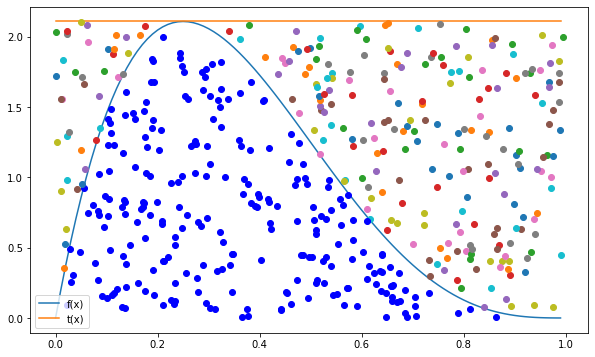

In [67]:
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x))

x = np.arange(0,1,0.01)
print(f'El máximo de f es: {max_f[0]}')

N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.figure(figsize=(10, 6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

random_variables = Acep_rechazo(R2,R1,f,t)

Código de solución estudiante 2

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Código de solución estudiante 1

Código de solución estudiante 2

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Código de solución estudiante 1

Código de solución estudiante 2

Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Código de solución estudiante 1

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

$$  k! = k(1+k)! $$

$$ \frac{k!}{(k+1)!} = \frac{1}{k+1} $$

$$  P(k+1)= \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(-\lambda)^{k}}{k!}}   $$

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

In [69]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

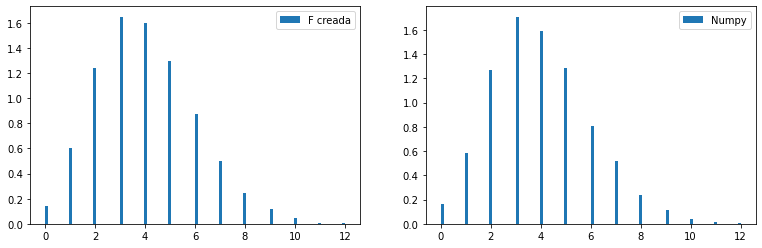

In [70]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='F creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Numpy')
plt.legend()
np.histogram
plt.show()

Código de solución estudiante 2